In [1]:
from collections.abc import Callable
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class Toss:
    id = 0

    def __init__(self, HH: float = 3, TT: float = 1, HT: float = 2) -> None:
        self.strategy_count = 0
        self.HH = HH
        self.TT = TT
        self.HT = HT
        Toss.id += 1

    def get_statistics(f):
        def wrapper(self, *args, **kwargs):
            res = f(self, *args, **kwargs)
            strategy_name = kwargs.get("strategy_name")
            n = kwargs.get("n")
            iteration = kwargs.get("iteration")
            min = np.min(res)
            max = np.max(res)
            positive_count = np.sum(res > 0)
            negative_count = np.sum(res < 0)
            mean = np.mean(res)
            median = np.median(res)
            std = np.std(res)
            statistics = {
                "# of Rounds": n,
                "Iteration": iteration,
                ">0": positive_count,
                "<0": negative_count,
                "Min": min,
                "Max": max,
                "Mean": mean,
                "Median": median,
                "Standard Deviation": std,
            }
            df = pd.DataFrame.from_dict(statistics, orient="index")
            df.columns = [f"Strategy{self.strategy_count:03d}: {strategy_name}"]

            class Report:
                def __init__(self, data, statistics) -> None:
                    self.data = data
                    self.statistics = statistics

            return Report(res, df)

        return wrapper

    @get_statistics
    def toss(
        self,
        your_strategy: Callable,
        n: int = 1,
        iteration: int = 1,
        strategy_name: str = "",
    ) -> np.ndarray:
        y = (self.TT + self.HT) / (self.HH + self.TT + 2 * self.HT)
        print(f"Initial Condition {Toss.id:03d}")
        print(f"\tHH:{self.HH}, TT:{self.TT}, HT / TH:{self.HT}")
        print(f"\t(HT / TH)^2 > HH*TT: {self.HT**2>self.HH*self.TT}")
        print(
            f"\tf(x,y) = {self.HH+self.TT+2*self.HT}xy - {self.TT+self.HT}x - {self.TT+self.HT}y + {self.TT}, 0 <= x <= 1, 0 <= y <= 1"
        )
        print(f"\tSaddle point is: ({y:.05f},{y:.05f})")

        n = int(n)
        iteration = int(iteration)
        gain = np.zeros(iteration)

        for i in range(iteration):
            gain[i] = 0
            for j in range(n):
                opponent = np.random.choice([0, 1], p=[y, 1 - y])
                you = your_strategy([0, 1])
                if opponent ^ you:
                    gain[i] -= self.HT
                if opponent == you and opponent == 0:
                    gain[i] += self.HH
                if opponent == you and opponent == 1:
                    gain[i] += self.TT

        self.strategy_count += 1
        return gain

In [3]:
toss = Toss(HH=3, TT=1, HT=2)

Initial Condition 001
	HH:3, TT:1, HT / TH:2
	(HT / TH)^2 > HH*TT: True
	f(x,y) = 8xy - 3x - 3y + 1, 0 <= x <= 1, 0 <= y <= 1
	Saddle point is: (0.37500,0.37500)


,Strategy001: H:T = 1:1
# of Rounds,10000.000000
Iteration,10000.000000
>0,0.000000
<0,10000.000000
Min,-2036.000000
Max,-409.000000
Mean,-1251.442100
Median,-1251.000000
Standard Deviation,200.494112


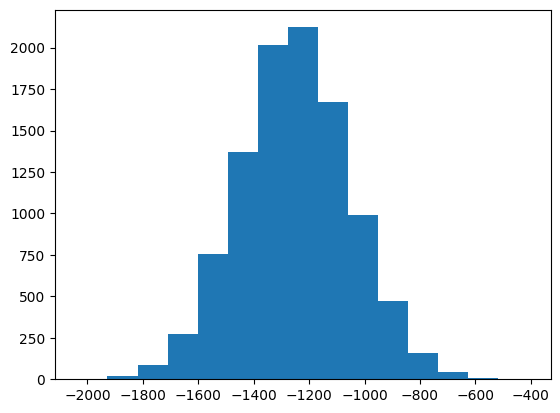

In [4]:
toss1 = toss.toss(
    lambda x: np.random.choice(x, p=[1 / 2, 1 / 2]),
    strategy_name="H:T = 1:1",
    n=1e4,
    iteration=1e4,
)
plt.hist(toss1.data,bins=15)
toss1.statistics

Initial Condition 001
	HH:3, TT:1, HT / TH:2
	(HT / TH)^2 > HH*TT: True
	f(x,y) = 8xy - 3x - 3y + 1, 0 <= x <= 1, 0 <= y <= 1
	Saddle point is: (0.37500,0.37500)


,"Strategy002: ""H:T = 3:5"""
# of Rounds,10000.000000
Iteration,10000.000000
>0,0.000000
<0,10000.000000
Min,-1908.000000
Max,-573.000000
Mean,-1249.034700
Median,-1249.000000
Standard Deviation,188.039111


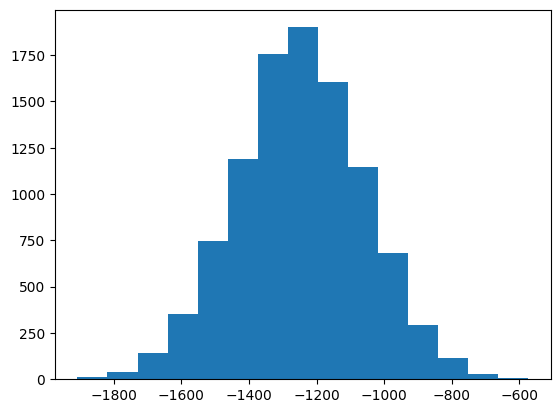

In [5]:
toss2 = toss.toss(
    lambda x: np.random.choice(x, p=[3 / 8, 5 / 8]),
    strategy_name='"H:T = 3:5"',
    n=1e4,
    iteration=1e4,
)
plt.hist(toss2.data, bins=15)
toss2.statistics

Initial Condition 001
	HH:3, TT:1, HT / TH:2
	(HT / TH)^2 > HH*TT: True
	f(x,y) = 8xy - 3x - 3y + 1, 0 <= x <= 1, 0 <= y <= 1
	Saddle point is: (0.37500,0.37500)


,"Strategy003: ""H:T = 5:3"""
# of Rounds,10000.000000
Iteration,10000.000000
>0,0.000000
<0,10000.000000
Min,-1967.000000
Max,-397.000000
Mean,-1244.147500
Median,-1245.000000
Standard Deviation,211.569768


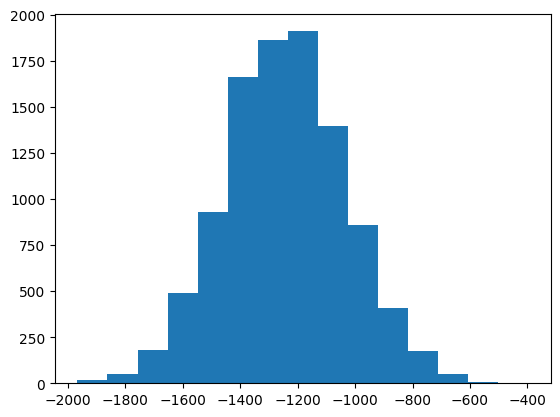

In [6]:
toss3 = toss.toss(
    lambda x: np.random.choice(x, p=[5 / 8, 3 / 8]),
    strategy_name='"H:T = 5:3"',
    n=1e4,
    iteration=1e4,
)
plt.hist(toss3.data,bins=15)
toss3.statistics